# "Global Happiness: Exploring Factors that Shape Well-being"
#### Stella Wroblewski
[Link to my GitHub webpage](https://swroblewski-tu.github.io/)


## Project Questions


1. Main Research Question:
How do socio-economic factors, quality of life indices, and dietary patterns contribute to the subjective well- being of individuals in different countries?

2. Happiness and Quality of Life:
To what extent does the Quality of Life Index align with reported happiness scores in different countries?
How do specific quality of life indicators (e.g., purchasing power, safety, healthcare) correlate with reported happiness?

3. Correlation between Quality of Life and Cost of Living:
What is the relationship between Quality of Life and Cost of Living, and how does it vary among countries?
Feature Importance for Happiness Prediction:
Which features contribute the most to the prediction of Happiness Scores, and how do these align with conventional wisdom or societal expectations?

4. Clustering and Regional Patterns:
Are there discernible regional patterns in happiness and quality of life indices, and how are these influenced by socio-economic and food-related factors?

5. Impact of Dietary Patterns on Happiness:
To what extent do different diets, such as Mediterranean or vegetarian, impact reported happiness scores?
Can specific food-related variables from the dataset be identified as significant predictors of happiness?

7. Ensemble Models and Predictive Accuracy:
How does the predictive accuracy of ensemble models, combining various base models, compare to individual models in predicting Happiness Scores?

8. Causal Relationships between Diet and Happiness:
Can causal relationships be inferred between changes in diet composition and reported happiness, accounting for potential confounding factors?

## Project Datasets


### Diet by country



[Link to FAO food balance data](https://www.fao.org/faostat/en/#data/FBS)

This dataset comes from the Food and Agriculture Organization of the United Nations. This data is collected every year and has been cited in numerous academic studies as well as National Geographic as a way to understand food consumption by country. For the scope of this project we will only be using the 2019 data. All data has been previously normalized to population. The main measure in this dataset that will be used is food supply quantity (how much of a certain food is in the food supply by weight). The data also divides into categories of where the food is going such as livestock, waste, seed for new crops, tourists, etc. 


### Quality of Life by country



[Link to Quality of Life data](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019)

This dataset comes from the website numbeo is the largest database of crowdsourced information regarding cost of living and quality of life. Because of the crowd sourcing nature of the data, there is a much wider scope of the countries included compared to other sources. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the website orginally can be found below. 


"Quality of Life Index is an estimation of the overall quality of life in a city or country.It takes into account various factors that impact one's quality of life, including purchasing power, pollution levels, housing affordability, cost of living, safety, healthcare quality, commute times, and climate conditions. The index is designed to provide a comparative measure, where a higher index value indicates a better quality of life.

It's important to note that the Quality of Life Index is based on data and user surveys collected by Numbeo. The surveys capture the perceptions and experiences of visitors to the website regarding various aspects of quality of life. Numbeo strives to provide accurate and up-to-date information by filtering out potential spam and ensuring a sufficient number of contributors for each city or country.

The index is calculated using an empirical formula that assigns weights to each factor based on its importance. The specific formula used by Numbeo may vary and is subject to change. It combines the data collected for each factor to generate a numerical value that represents the quality of life in a particular location.

The Quality of Life Index (higher is better) is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:

Purchasing Power Index (higher is better)
Pollution Index (lower is better)
House Price to Income Ratio (lower is better)
Cost of Living Index (lower is better)
Safety Index (higher is better)
Health Care Index (higher is better)
Traffic Commute Time Index (lower is better)
Climate Index (higher is better)"

### Happiness by country



[Link to World Happiness Report](https://worldhappiness.report/ed/2019/#appendices-and-data)

[Link to World Happiness Report data](https://worldhappiness.report/data/)

This dataset comes from the "World Happiness Report". This data is collected every year and has been cited in numerous academic studies as a way to understand percieved happiness by country. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the project orginally can be found below. 

"The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2019 focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes."

## Proposed Models


1. Prediction Model with Expanded Features:
Build an enhanced happiness prediction model using a combination of socio-economic features, quality of life indices, and additional features from the food dataset (e.g., diet composition, food availability).
Objective: Understand how a broader set of features, including food-related variables, contributes to predicting happiness.

2. Food Impact Analysis Model:
Develop a model to analyze the impact of different diets (e.g., Mediterranean, vegetarian) on happiness scores, considering both quality of life indices and happiness data.
Objective: Investigate the relationship between specific dietary patterns and subjective well-being, providing insights into the role of food in happiness.

3. Regional Happiness Clustering with Food Factors:
Apply clustering algorithms to group countries based on happiness scores, quality of life indices, and food-related features.
Objective: Identify regional patterns in well-being, considering both socio-economic factors and dietary habits.

4. Happiness Prediction with Ensemble Models:
Utilize ensemble models to combine predictions from multiple base models, including linear regression, random forest, and potentially models focused on food factors.
Objective: Improve predictive accuracy by leveraging the strengths of different modeling approaches.

5. Causal Inference Analysis:
Apply causal inference techniques to investigate potential causal relationships between food-related variables and happiness, addressing confounding factors.
Objective: Explore whether changes in diet composition have a causal impact on happiness, considering potential interventions.



## Extracting and Loading Datasets

##### Import necessary libraries: 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Extracting and Loading Quality of Life Dataset

##### Scrape/extract quality of life table data: 

In [2]:
# fetch the url 
url = "https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# locate the table
table = soup.find('table', {'id': 't2'})

# extract the data from the table as needed
data = []
for row in table.find_all('tr')[1:]:  # skip the header row
    cols = row.find_all('td')
    country = cols[1].text.strip()
    quality_of_life_index = cols[2].text.strip()
    cost_of_living_index = cols[3].text.strip()
    property_price_to_income_ratio = cols[4].text.strip()
    traffic_commute_time_index = cols[5].text.strip()

    data.append([country, quality_of_life_index, cost_of_living_index,
                 property_price_to_income_ratio, traffic_commute_time_index])


##### Create pandas data frame and correct data types:

In [3]:
# create dataframe and tidy the data
qol_data = pd.DataFrame(data, columns=['Country', 'Quality of Life Index', 'Cost of Living Index',
                                     'Property Price to Income Ratio', 'Traffic Commute Time Index'])

# convert to appropriate data types
qol_data['Quality of Life Index'] = qol_data['Quality of Life Index'].astype(float)
qol_data['Cost of Living Index'] = qol_data['Cost of Living Index'].astype(float)
qol_data['Property Price to Income Ratio'] = qol_data['Property Price to Income Ratio'].astype(float)
qol_data['Traffic Commute Time Index'] = qol_data['Traffic Commute Time Index'].astype(float)

qol_data.head()

,Country,Quality of Life Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index
0,Denmark,198.6,114.4,75.8,79.4
1,Switzerland,195.9,129.7,78.5,72.7
2,Finland,194.0,112.3,77.2,73.5
3,Australia,191.1,122.9,57.2,76.4
4,Austria,191.1,96.7,78.6,79.2


#### Extracting and Loading Happiness Dataset

In [4]:
happiness_data = pd.read_csv("2019_happiness_date.csv")

# merge quality of life and happiness datasets
merged_data = pd.merge(qol_data, happiness_data, on='Country', how='inner')

merged_data.head()

,Country,Quality of Life Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Denmark,198.6,114.4,75.8,79.4,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
1,Switzerland,195.9,129.7,78.5,72.7,7.480,7.553,7.408,2.272,1.452,1.526,1.052,0.572,0.263,0.343
2,Finland,194.0,112.3,77.2,73.5,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
3,Australia,191.1,122.9,57.2,76.4,7.228,7.315,7.141,2.094,1.372,1.548,1.036,0.557,0.332,0.290
4,Austria,191.1,96.7,78.6,79.2,7.246,7.313,7.179,2.378,1.376,1.475,1.016,0.532,0.244,0.226


#### Extracting and Loading Food Dataset

In [5]:
food_data = pd.read_csv("2019_food_data.csv")

## Exploratory Data Analysis (EDA)

### Find the top 5 countries with the highest quality of life scores:

In [6]:
import matplotlib.pyplot as plt

# find the top 5 countries with the highest QOL score
top_5_qol = qol_data.nlargest(5, 'Quality of Life Index')

# show top five QOL countries
print("Top 5 Countries with the Highest Quality of Life Index:")
print(top_5_qol[['Country', 'Quality of Life Index']])

Top 5 Countries with the Highest Quality of Life Index:
       Country  Quality of Life Index
0      Denmark                  198.6
1  Switzerland                  195.9
2      Finland                  194.0
3    Australia                  191.1
4      Austria                  191.1


### Display initial summary statstics for the quality of life dataset

In [7]:
# find initial summary stats
summary_stats = qol_data.describe()

# show summary stats
print("\nSummary Statistics for Quality of Life Data:")
print(summary_stats[['Quality of Life Index']])


Summary Statistics for Quality of Life Data:
       Quality of Life Index
count              71.000000
mean              142.311268
std                32.931416
min                84.000000
25%               113.000000
50%               145.700000
75%               169.050000
max               198.600000


### Graph 1: The bar plot shows the distribution of the quality of life scores to show the spread of values. The range, also displayed in the summary statistics above, is from 84 to 198.

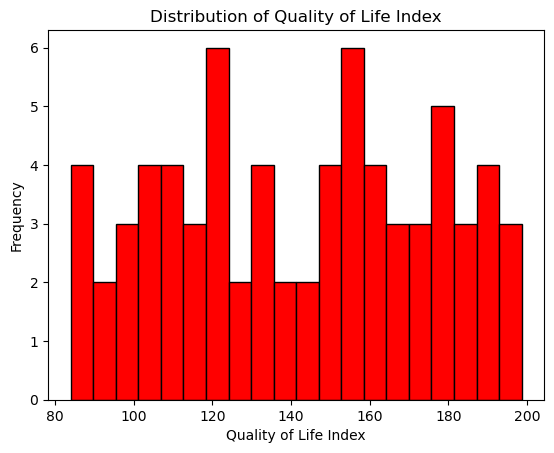

In [8]:
# graph distribution of qol to show the spread of values 
plt.hist(qol_data['Quality of Life Index'], bins=20, edgecolor='black', color='r')
plt.title('Distribution of Quality of Life Index')
plt.xlabel('Quality of Life Index')
plt.ylabel('Frequency')
plt.show()

### Graph 2: the quality of life scores against cost of living. The scatter plot reveals a strong positive correlation between Quality of Life Index and Cost of Living Index. 

#### This correlation suggests that countries with higher Quality of Life tend to have higher costs of living. This may be attributed to better amenities, healthcare, and overall standards of living, which often come at a higher financial cost.

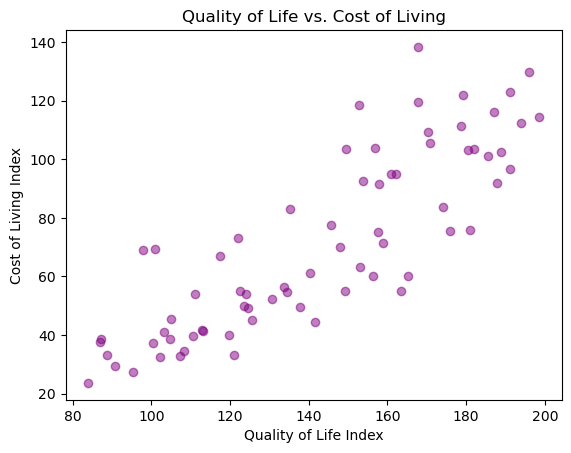


Correlation between Quality of Life and Cost of Living: 0.85


In [9]:
# graph quality of living by cost of living 
plt.scatter(qol_data['Quality of Life Index'], qol_data['Cost of Living Index'], alpha=0.5, color ='purple')
plt.title('Quality of Life vs. Cost of Living')
plt.xlabel('Quality of Life Index')
plt.ylabel('Cost of Living Index')
plt.show()

# display the correlation between QOL and cost of living
correlation = qol_data['Quality of Life Index'].corr(qol_data['Cost of Living Index'])
print(f"\nCorrelation between Quality of Life and Cost of Living: {correlation:.2f}")

### Graph 3: The scatter plot explores the relationship between Happiness Score and Quality of Life Index for different countries in 2019. Each point represents a country, and there's a visible positive correlation, suggesting that countries with higher Quality of Life tend to have higher Happiness Scores. 

#### The positive correlation implies that as the overall quality of life improves, citizens of that country are more likely to report higher levels of happiness. This aligns with the intuitive expectation that factors contributing to a better quality of life, such as healthcare, safety, and economic prosperity, positively influence the subjective well-being of individuals.

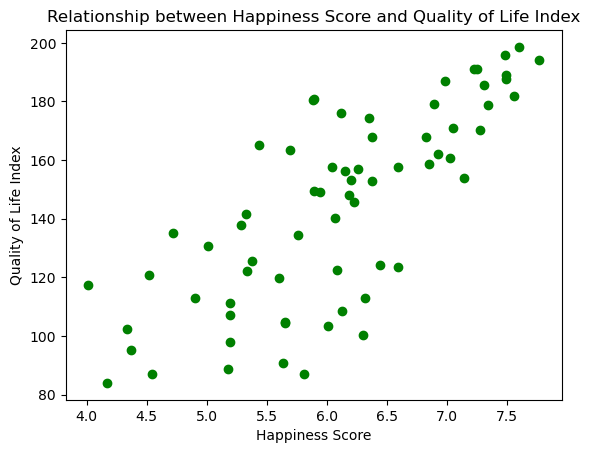

In [10]:
plt.scatter(merged_data['Happiness score'], merged_data['Quality of Life Index'], color='green')
plt.title('Relationship between Happiness Score and Quality of Life Index')
plt.xlabel('Happiness Score')
plt.ylabel('Quality of Life Index')
plt.show()


### Regression model for happiness scores

In [11]:
# features for prediction
features = ['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
            'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# split the data into features and target variable
X = merged_data[features]
y = merged_data['Happiness score']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create linear regression model
model = LinearRegression()

# train model on training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# eval the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


### Graph 4: The scatter plot compares the actual Happiness Scores to the scores predicted by a linear regression model. Each point on the plot represents a country, where the x-axis represents the actual Happiness Score, and the y-axis represents the predicted score from the linear regression model.

#### The red dashed line serves as a reference for a perfect match between actual and predicted scores. Deviations from this line indicate the model's prediction errors. The concentration of points close to the line suggests that the linear regression model is relatively accurate in predicting Happiness Scores. However, noticeable deviations may indicate areas where the model can be further refined.


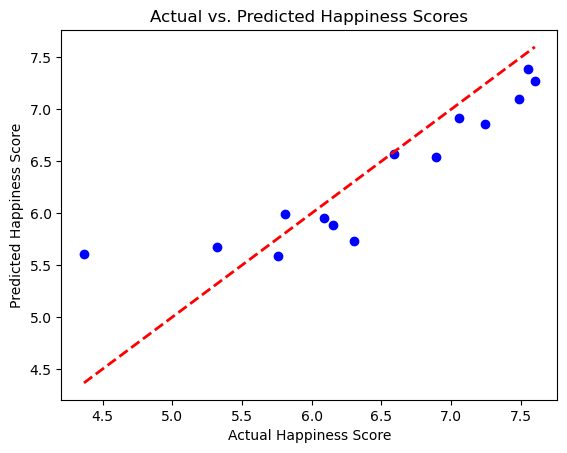

Mean Squared Error: 0.19477305434861633
R-squared: 0.7645384279609307


In [12]:
# scatter plot of actual vs. predicted happiness scores
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#### Graph 5: The bar plot illustrates the importance of different features in predicting the Happiness Score, as determined by a Random Forest Regression model. 

#### Features such as 'GDP per capita' and 'Social support' have higher importance values.

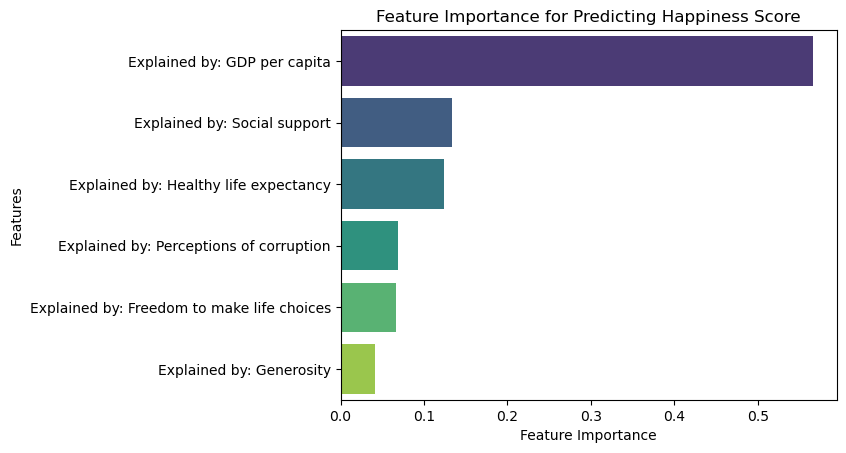

In [13]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit model to the data
rf_model.fit(X_train, y_train)

# sorting feature importance 
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# bar plot
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance for Predicting Happiness Score')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### Graph 6: These graphs are a sample as we begin to look at how diet and food play into these evaluations. 

#### The bar graphs show the amount of wheat production and domestic wheat supply by country. This will factor into our analysis later. 

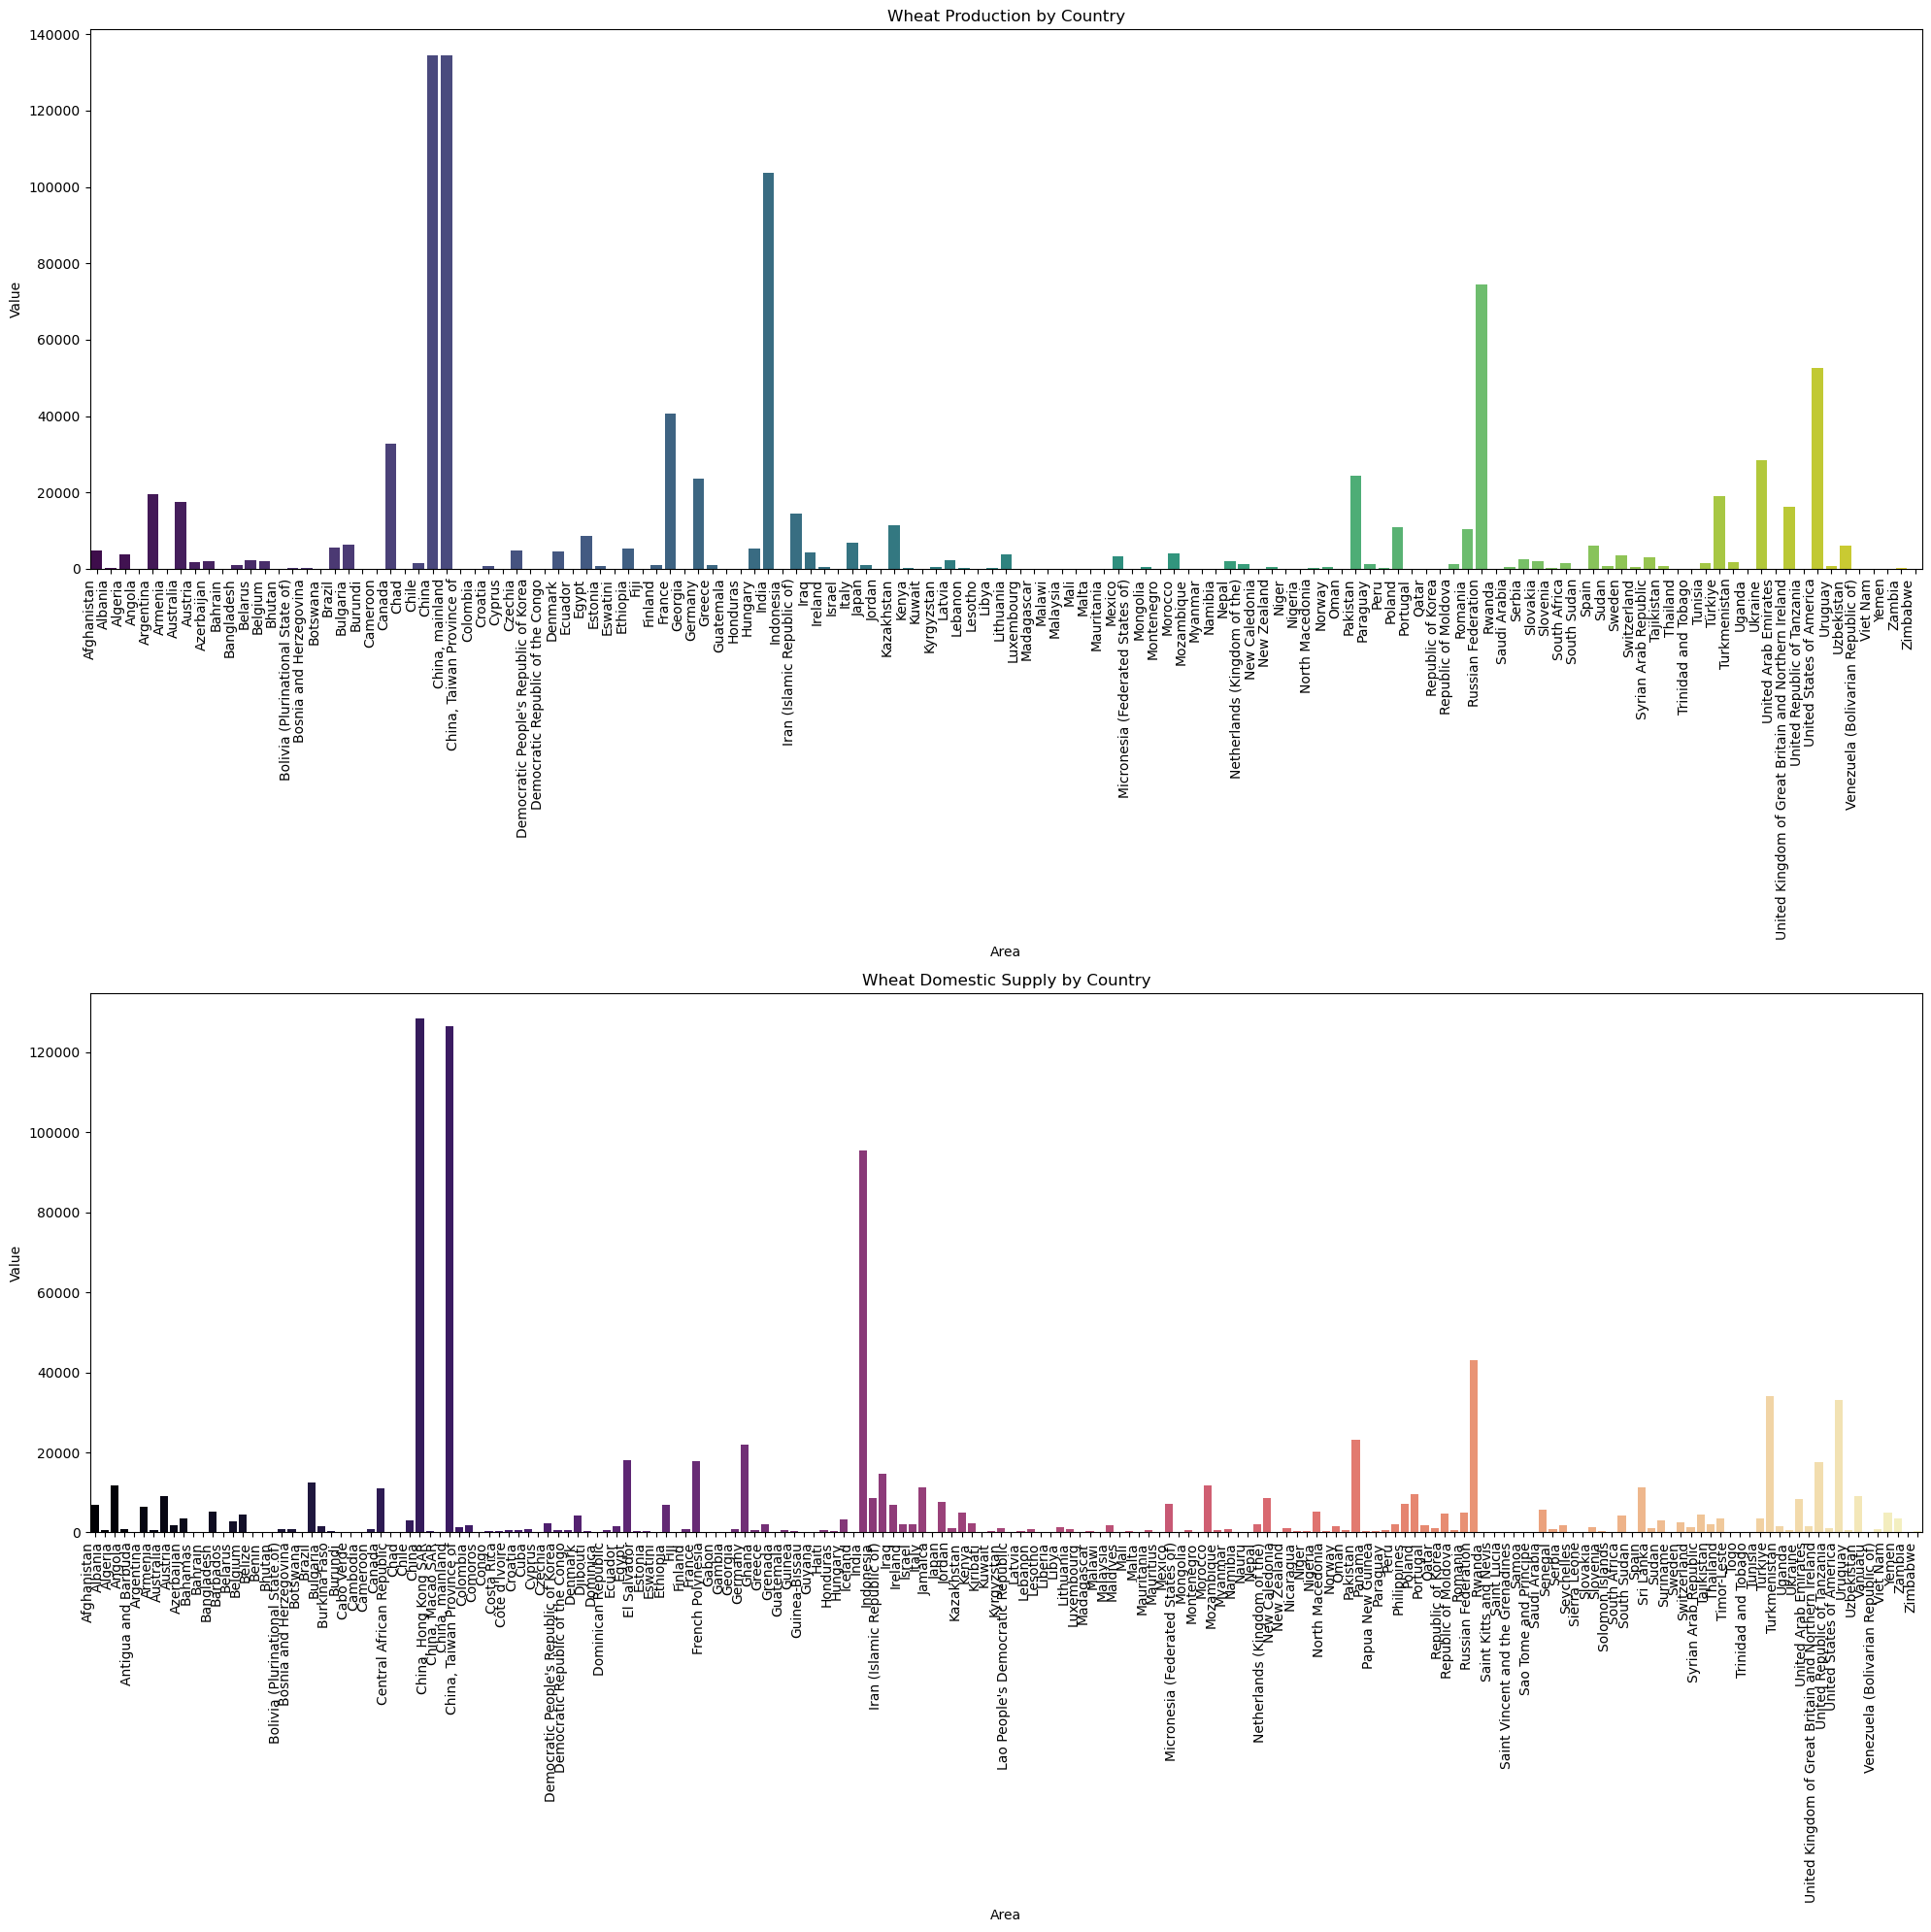

In [14]:
# filter data for wheat production and domestic supply
wheat_data = food_data[food_data['Item'] == 'Wheat and products']

plt.figure(figsize=(20, 20))

# bar chart for wheat production
plt.subplot(2, 1, 1)
sns.barplot(x='Area', y='Value', data=wheat_data[wheat_data['Element'] == 'Production'], palette='viridis')
plt.title('Wheat Production by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# bar chart for wheat domestic supply
plt.subplot(2, 1, 2)
sns.barplot(x='Area', y='Value', data=wheat_data[wheat_data['Element'] == 'Domestic supply quantity'], palette='magma')
plt.title('Wheat Domestic Supply by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()

plt.show()